In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
n=300
x=np.linspace(0,30,n)
y=np.linspace(0,30,n)
t=np.linspace(0,60,n)
dx=x[1]-x[0]
dy=y[1]-y[0]
c=1.0
dt=0.5*dx/c
a=c*dt/dx
b=c*dt/dy

In [3]:
#creates the x part of the wave
#ux_init=np.zeros(n)
#set the initial conditions(perturbation)
#ux_init[9]=-0.5
#as a suggestion from Veronica, the boundary conditions are constants

In [4]:
#creates the y part of the wave
#uy_init=np.zeros(n)
#sets the initial conditions (perturbation)
#uy_init[9]=-0.5

In [57]:
#creates a matrix of zeros
initial=np.zeros((n,n))
#sets the perturbation in the given point
initial[n/3][n/2-1]=-0.5
#creates the mask(search for doc), used for simulating the slit
#mascara=np.zeros((n,n))
#sets the constant conditions for the walls, remember that the mask is a set of booleans
#mascara[:,0]=1.0#upper wall
#mascara[:,n-1]=1.0#lower wall
#mascara[0,:n-1]=1.0#left hand wal
#mascara[n-1,:n-1]=1.0#righ hand wall
#mascara[-(n/3)][-n/3]=1
#using mask array creates the matrix of the propagating wave
#initial=np.ma.masked_array(initial_0,mask=mascara)
print initial


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [ ]:
#primer punto:
#expresion 
#
#
#
#
#
#
#
#
#


In [ ]:
for n in range(1196):
    for i in range(np.size(x)):
        for j in range(np.size(y)):
            

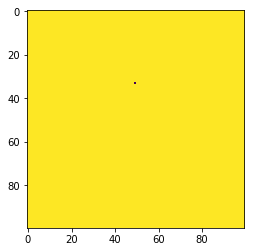

In [58]:
plt.imshow(initial)
plt.show()
#implementation of the solution is based on the notebook available in github
#value of the slit can be considered as a fixed condition

In [75]:
#calculates for t=1 using numpy roll
#future_1=np.zeros((n+1,n+1))
next_x=np.roll(initial,+1,axis=0)
next_y=np.roll(initial,+1,axis=1)
down_x=np.roll(initial,-1,axis=0)
down_y=np.roll(initial,-1,axis=1)
future=(a**2/2)*(next_x+down_x)+(b**2/2)*(next_y+down_y)+initial*(1-b**2-a**2)
past=np.copy(initial)
present=np.copy(future)


In [77]:
#knowing t=0 and t=1 we can continue the temporal loop
#calculate the number of temporal iterations
#m=60.0/dt
fotogramas=[]
for t in range(1196):
    downx=np.roll(present,-1,axis=0)
    upx=np.roll(present,+1,axis=0)  
    downy=np.roll(present,-1,axis=1)
    upy=np.roll(present,+1,axis=1)
    future=(a**2/2)*(upx+downx)+(b**2/2)*(upy+downy)+present*(1-b**2-a**2)-past
    past=np.copy(present)
    present=np.copy(future)
    fotogramas.append(present)

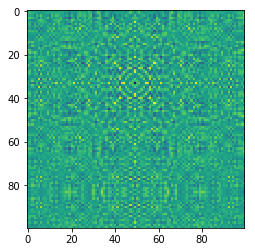

In [78]:
plt.imshow(present)
plt.show()